In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1590354300260_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sb
from pyspark.sql.functions import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
sc.install_pypi_package("s3fs")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
import s3fs

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df = pd.read_csv('s3://stock-data-delivery/results.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df.sort_values("Max_High", axis=0, ascending=False, inplace=False).head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    name  Max_High  Hour_of_Day
42  SHOP    758.09           13
44  SHOP    757.47           15
46  SHOP    755.82           17
48  SHOP    755.57           19
45  SHOP    754.16           16

In [23]:
groupbyobj=df.groupby('name').Max_High.mean()
print(groupbyobj)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name
BYND    138.020000
DDOG     65.525714
FB      204.878571
NFLX    443.550000
OKTA    178.410000
PINS     16.888571
SHOP    754.987143
SNAP     16.955714
SQ       76.332857
TTD     294.331429
Name: Max_High, dtype: float64

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

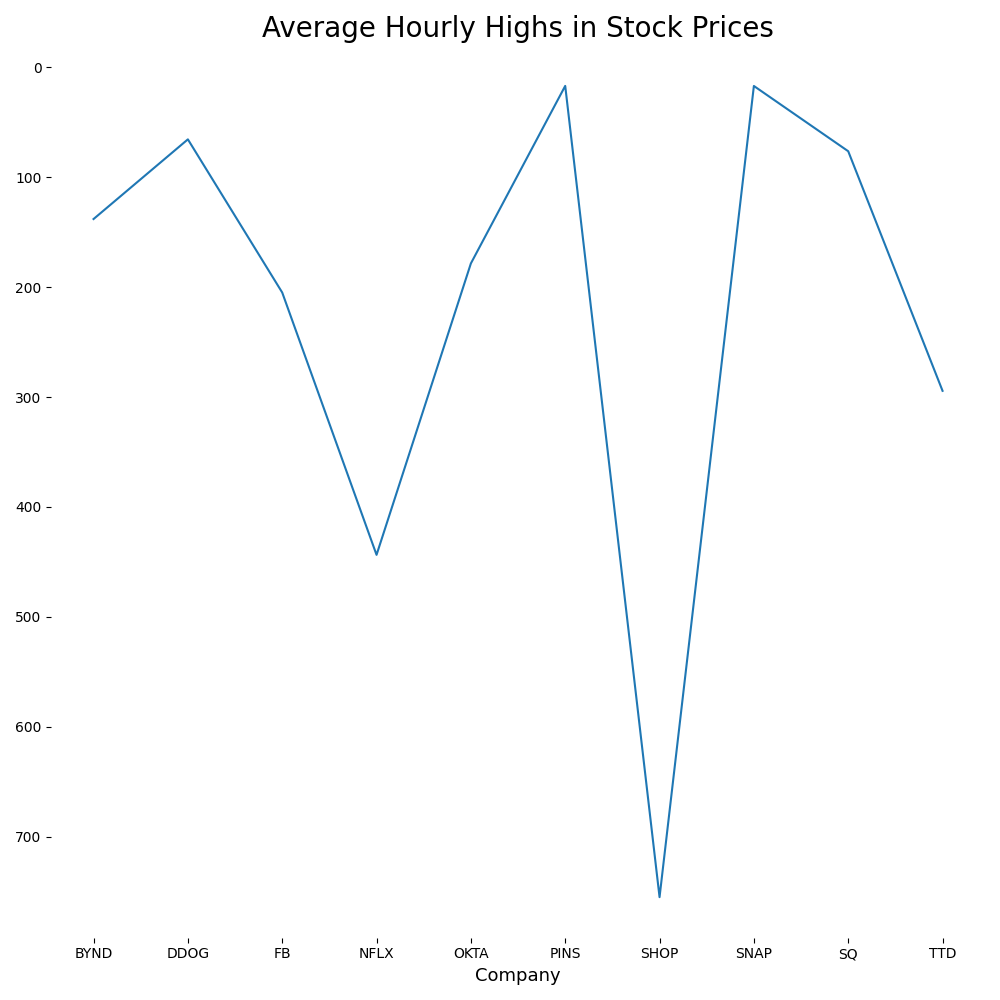

In [26]:
plt.clf()
plt.figure(figsize=(10,10))
plt.title('Average Hourly Highs in Stock Prices', fontsize=20)
#plt.yticks(fontsize=12)
#plt.xticks(fontsize=12)
plt.xlabel('Price',fontsize=13)
plt.xlabel('Company',fontsize=13)
plt.box(False)
plt.gca().invert_yaxis()
plt.plot(groupbyobj)
plt.tight_layout()
%matplot plt

In [28]:
def meanfinder(names):
    return(df[df.name==names].Max_High.mean())
df['avg']=df.name.apply(meanfinder)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
df['deviation']=df.Max_High-df.avg

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

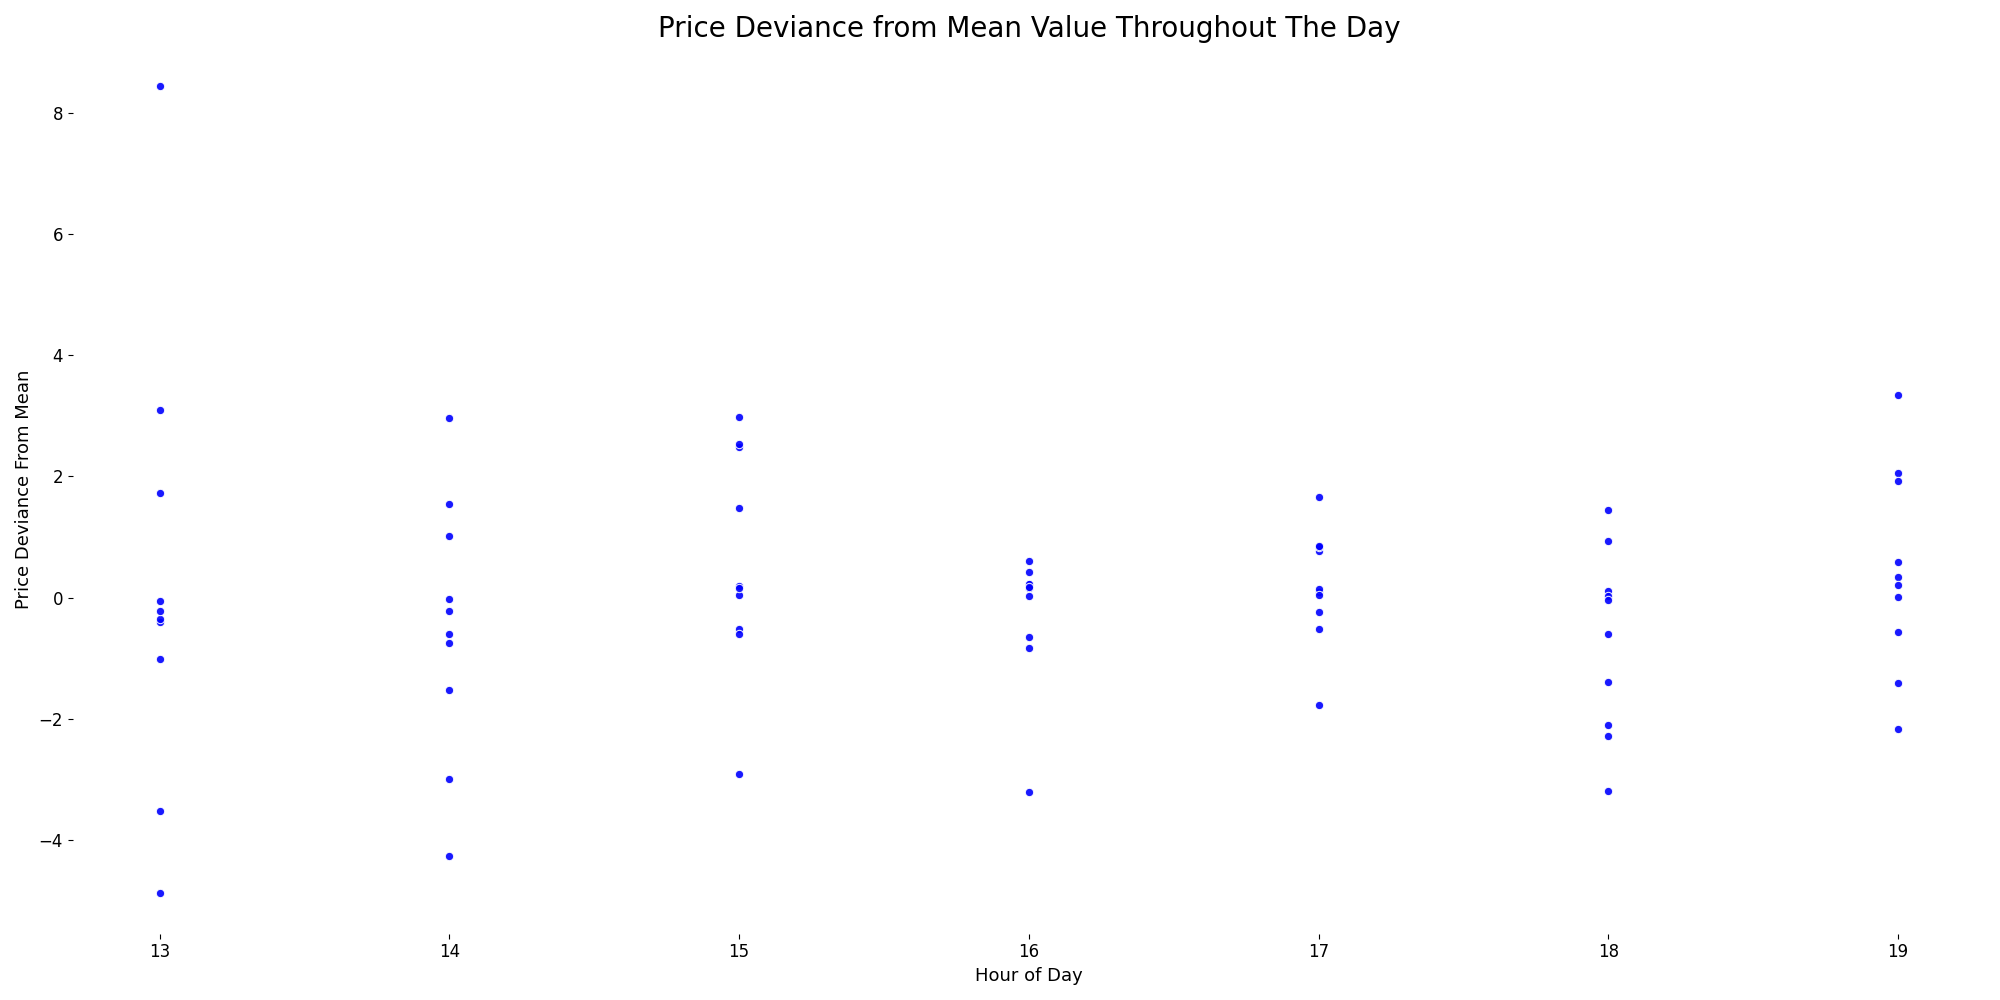

In [32]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title('Price Deviance from Mean Value Throughout The Day', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.box(False)
#sb.scatterplot(elitemode['yrs_elite'],elitemode['stars2'],color="red")
sb.scatterplot(df['Hour_of_Day'],df['deviation'],alpha=0.9, color="blue")
plt.xlabel("Hour of Day",fontsize=13)
plt.ylabel("Price Deviance From Mean", fontsize = 13)
plt.tight_layout()
%matplot plt